In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


In [2]:
from keras import models, layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [4]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 310us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2821 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2939 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1435 - acc: 0.9501 - val_loss: 0.3116 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1257 - acc: 0.9558 - val_loss: 0.3483 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 4s 145us/step - 

In [5]:
smaller_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.5670 - acc: 0.7410 - val_loss: 0.4849 - val_acc: 0.8256
Epoch 2/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.3924 - acc: 0.8895 - val_loss: 0.3609 - val_acc: 0.8780
Epoch 3/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2791 - acc: 0.9174 - val_loss: 0.3012 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2213 - acc: 0.9278 - val_loss: 0.2823 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1877 - acc: 0.9375 - val_loss: 0.2816 - val_acc: 0.8863
Epoch 6/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.1649 - acc: 0.9448 - val_loss: 0.2858 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1467 - acc: 0.9518 - val_loss: 0.2954 - 

In [7]:
import matplotlib.pyplot as plt

epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']

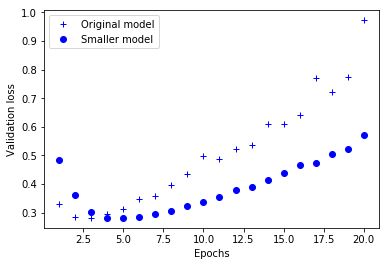

In [8]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 162us/step - loss: 6.4483e-04 - acc: 1.0000 - val_loss: 1.0740 - val_acc: 0.8813
Epoch 2/20
25000/25000 [==============================] - 4s 158us/step - loss: 6.4483e-04 - acc: 1.0000 - val_loss: 1.0756 - val_acc: 0.8812
Epoch 3/20
25000/25000 [==============================] - 4s 159us/step - loss: 6.4483e-04 - acc: 1.0000 - val_loss: 1.0777 - val_acc: 0.8814
Epoch 4/20
25000/25000 [==============================] - 4s 159us/step - loss: 6.4483e-04 - acc: 1.0000 - val_loss: 1.0794 - val_acc: 0.8814
Epoch 5/20
25000/25000 [==============================] - 4s 159us/step - loss: 6.4483e-04 - acc: 1.0000 - val_loss: 1.0808 - val_acc: 0.8813
Epoch 6/20
25000/25000 [==============================] - 4s 157us/step - loss: 6.4483e-04 - acc: 1.0000 - val_loss: 1.0819 - val_acc: 0.8812
Epoch 7/20
25000/25000 [==============================] - 4s 158us/step - loss: 6.4483e-04 - acc: 

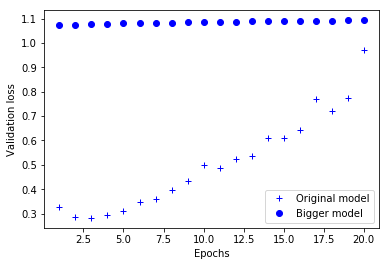

In [17]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

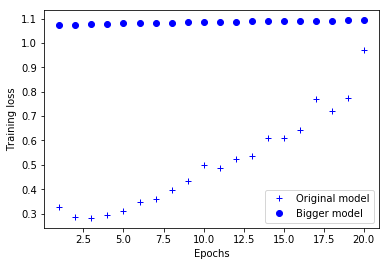

In [18]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [20]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.4844 - acc: 0.8288 - val_loss: 0.3787 - val_acc: 0.8763
Epoch 2/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3069 - acc: 0.9058 - val_loss: 0.3335 - val_acc: 0.8861
Epoch 3/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2653 - acc: 0.9203 - val_loss: 0.3456 - val_acc: 0.8781
Epoch 4/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.2418 - acc: 0.9296 - val_loss: 0.3399 - val_acc: 0.8814
Epoch 5/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2289 - acc: 0.9349 - val_loss: 0.3490 - val_acc: 0.8800
Epoch 6/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2176 - acc: 0.9398 - val_loss: 0.3647 - val_acc: 0.8760
Epoch 7/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2116 - acc: 0.9424 - val_loss: 0.4034 - 

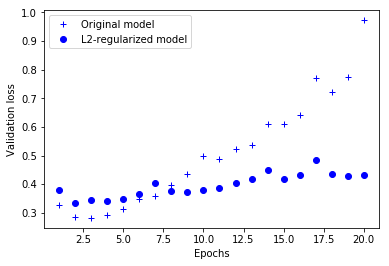

In [23]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
'''
L1 규제
regularizers.l1(0.001)

L1 L2 병행
regularizers.l1_l2(l1=0.001, l2=0.001)
'''

In [24]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0001), 
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [25]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.5466 - acc: 0.8162 - val_loss: 0.4430 - val_acc: 0.8526
Epoch 2/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.3646 - acc: 0.8952 - val_loss: 0.3756 - val_acc: 0.8836
Epoch 3/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.3273 - acc: 0.9064 - val_loss: 0.3729 - val_acc: 0.8821
Epoch 4/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.3149 - acc: 0.9092 - val_loss: 0.3584 - val_acc: 0.8875
Epoch 5/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.3019 - acc: 0.9150 - val_loss: 0.3782 - val_acc: 0.8782
Epoch 6/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.2960 - acc: 0.9183 - val_loss: 0.3675 - val_acc: 0.8852
Epoch 7/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.2880 - acc: 0.9206 - val_loss: 0.3672 - 

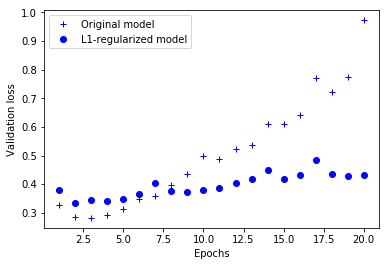

In [26]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [27]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001,
                                                                     l2=0.0001),
                          activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001,
                                                                     l2=0.0001), 
                          activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

l1l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train, epochs=20, batch_size=512, 
                                   validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.5664 - acc: 0.8176 - val_loss: 0.4531 - val_acc: 0.8545
Epoch 2/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.3821 - acc: 0.8925 - val_loss: 0.3792 - val_acc: 0.8850
Epoch 3/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3408 - acc: 0.9028 - val_loss: 0.3641 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3218 - acc: 0.9090 - val_loss: 0.3616 - val_acc: 0.8881
Epoch 5/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3134 - acc: 0.9110 - val_loss: 0.3694 - val_acc: 0.8851
Epoch 6/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.3064 - acc: 0.9141 - val_loss: 0.3666 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3021 - acc: 0.9168 - val_loss: 0.3728 - 

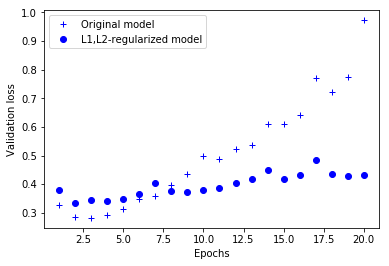

In [29]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()